# 4.5.2 요약통계 및 도수분포표 검토

In [1]:
import pandas as pd       # pandas library 불러내기
import numpy as np        # numpy library 불러내기
pd.set_option('display.max_columns', None)   # 결과물로 보여주는 열 갯수 최대화
pd.set_option('display.max_rows', None)      # 결과물로 보여주는 행 갯수 최대화
df = pd.read_csv('comb32.csv')               # 원본 데이터파일 불러와서 데이터프레임(df)에 저장
df.shape

(21395, 32)

In [8]:
# 참조 코딩
df.columns

Index(['ACCESS', 'ACR', 'AGEP', 'BATH', 'BDSP', 'BLD', 'CONP', 'COW', 'ELEP',
       'FESRP', 'FKITP', 'FPARC', 'FSCHP', 'FTAXP', 'GASP', 'HHL', 'HHT',
       'HINCP', 'LANX', 'MAR', 'MV', 'NRC', 'R18', 'R65', 'RAC1P', 'RMSP',
       'RWAT', 'SCH', 'SCHL', 'SEX', 'VALP', 'VALP_B1'],
      dtype='object')

In [2]:
pd.options.display.float_format = '{:.2f}'.format # 소숫점 2자리로 숫자 표기 제한

cols1 = ['AGEP','BDSP','CONP', 'ELEP','GASP','HINCP', 'NRC','RMSP', 'VALP'] # 구간 변수를 cols1에 저장
df[cols1].describe()

,AGEP,BDSP,CONP,ELEP,GASP,HINCP,NRC,RMSP,VALP
count,21395.00,21395.00,21395.00,21395.00,21395.00,21395.00,21395.00,21395.00,21395.00
mean,43.14,3.16,1.63,162.05,54.74,87159.60,0.98,6.57,161900.85
std,24.05,0.77,32.52,88.36,57.20,78714.28,1.30,1.98,122626.22
min,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,1000.00
25%,21.00,3.00,0.00,100.00,3.00,40000.00,0.00,5.00,80000.00
50%,46.00,3.00,0.00,150.00,50.00,70000.00,0.00,6.00,135000.00
75%,63.00,4.00,0.00,200.00,80.00,110000.00,2.00,8.00,200000.00
max,93.00,5.00,1100.00,560.00,400.00,1106000.00,7.00,16.00,855000.00


In [11]:
df[cols1].skew()

AGEP    -0.12
BDSP    -0.04
CONP    25.96
ELEP     1.43
GASP     2.56
HINCP    3.49
NRC      1.27
RMSP     1.29
VALP     1.91
dtype: float64

In [12]:
df[cols1].kurtosis()

AGEP     -1.10
BDSP      1.17
CONP    761.04
ELEP      3.18
GASP     10.95
HINCP    21.94
NRC       1.17
RMSP      3.56
VALP      5.31
dtype: float64

In [13]:
df['CONP'].value_counts()  # 변수 CONP의 분포 확인 (개수 기준)

0.00       21305
1100.00       10
400.00         6
120.00         5
100.00         4
300.00         4
500.00         4
430.00         3
250.00         3
160.00         3
60.00          3
150.00         3
800.00         3
780.00         3
190.00         3
260.00         3
200.00         2
580.00         2
270.00         2
20.00          2
170.00         2
230.00         2
140.00         2
670.00         2
510.00         2
80.00          2
220.00         2
280.00         1
310.00         1
90.00          1
420.00         1
240.00         1
350.00         1
30.00          1
180.00         1
Name: CONP, dtype: int64

In [3]:
pd.options.display.float_format = '{:.3f}'.format # 소숫점 3자리로 숫자 표기 제한
df['CONP'].value_counts(normalize=True)           # 변수 CONP의 분포 확인 (비율 기준)

0.000      0.996
1100.000   0.000
400.000    0.000
120.000    0.000
500.000    0.000
100.000    0.000
300.000    0.000
800.000    0.000
60.000     0.000
260.000    0.000
780.000    0.000
160.000    0.000
150.000    0.000
190.000    0.000
250.000    0.000
430.000    0.000
140.000    0.000
220.000    0.000
200.000    0.000
510.000    0.000
170.000    0.000
670.000    0.000
80.000     0.000
230.000    0.000
270.000    0.000
20.000     0.000
580.000    0.000
30.000     0.000
420.000    0.000
90.000     0.000
240.000    0.000
180.000    0.000
280.000    0.000
310.000    0.000
350.000    0.000
Name: CONP, dtype: float64

In [4]:
df.drop('CONP', axis=1, inplace=True) # 데이터프레임 df에서 변수 CONP 제거
df.shape

(21395, 31)

In [5]:
df['MAR'].value_counts(dropna=False)

1    10912
5     7074
3     1915
2     1288
4      206
Name: MAR, dtype: int64

In [6]:
pd.crosstab(df['MAR'], columns='count')   # frequency table 생성(개수 기준)

col_0,count
MAR,
1,10912
2,1288
3,1915
4,206
5,7074


In [7]:
pd.crosstab(df['MAR'], columns='ratio', normalize=True)   # frequency table 생성(비율 기준)

col_0,ratio
MAR,
1,0.510
2,0.060
3,0.090
4,0.010
5,0.331


In [8]:
pd.crosstab(df['MAR'], df['VALP_B1'])   # frequency table 생성(개수 기준)

VALP_B1,0.000,1.000
MAR,,
1,4765,6147
2,817,471
3,1257,658
4,137,69
5,3662,3412


In [9]:
pd.crosstab(df['MAR'], df['VALP_B1'], normalize=True)   # frequency table 생성(비율 기준)

VALP_B1,0.000,1.000
MAR,,
1,0.223,0.287
2,0.038,0.022
3,0.059,0.031
4,0.006,0.003
5,0.171,0.159


# 4.5.3 이상값(outlier) 제거

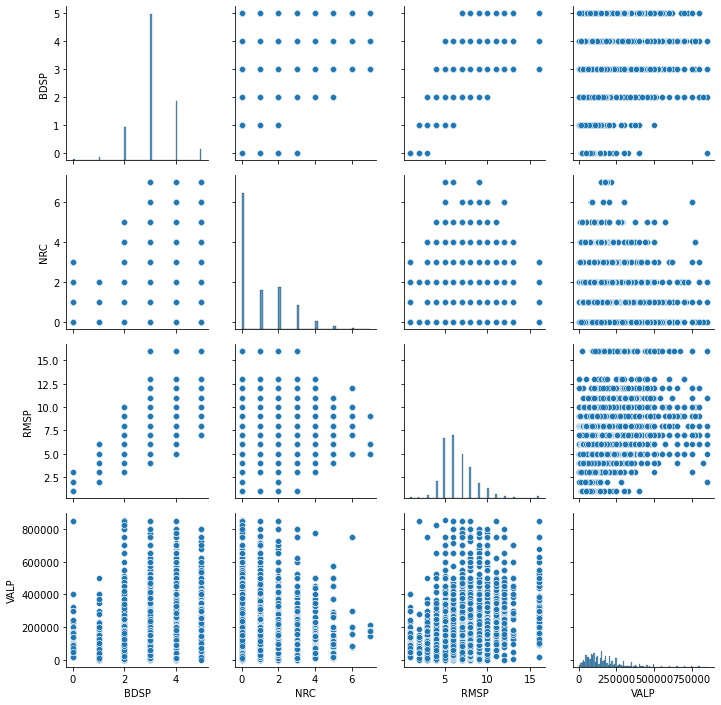

In [10]:
import seaborn as sns

dft1 = df[['BDSP','NRC', 'RMSP', 'VALP']]
g = sns.PairGrid(dft1)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot);

In [11]:
Q1 = df[['BDSP','NRC', 'RMSP']].quantile(0.25)
Q3 = df[['BDSP','NRC', 'RMSP']].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

BDSP   1.000
NRC    2.000
RMSP   3.000
dtype: float64


In [12]:
Lower = Q1-3.0*IQR
Upper = Q3+3.0*IQR
print(Lower)

BDSP    0.000
NRC    -6.000
RMSP   -4.000
dtype: float64


In [13]:
print(Upper)

BDSP    7.000
NRC     8.000
RMSP   17.000
dtype: float64


In [14]:
df[['BDSP','NRC', 'RMSP']].min()

BDSP   0.000
NRC    0.000
RMSP   1.000
dtype: float64

In [15]:
df[['BDSP','NRC', 'RMSP']].max()

BDSP    5.000
NRC     7.000
RMSP   16.000
dtype: float64

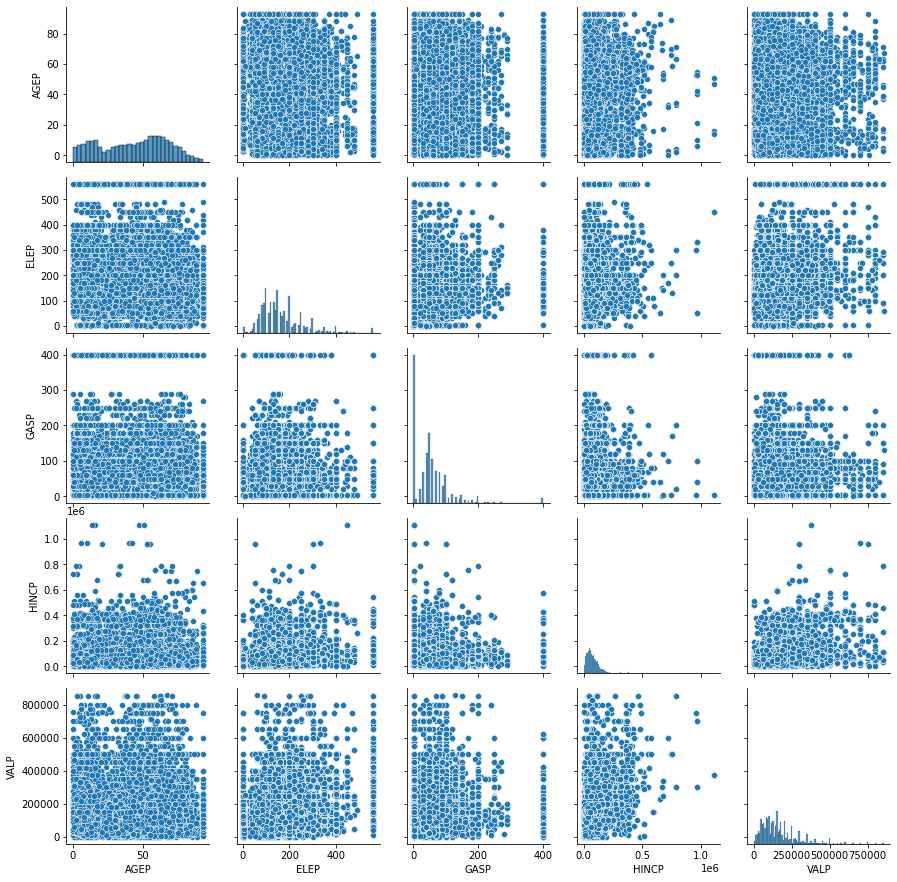

In [16]:
dft2 = df[['AGEP','ELEP','GASP','HINCP','VALP']]
g = sns.PairGrid(dft2)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot);

In [17]:
Q1 = df[['AGEP','ELEP','GASP','HINCP','VALP']].quantile(0.25)
Q3 = df[['AGEP','ELEP','GASP','HINCP','VALP']].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

AGEP        42.000
ELEP       100.000
GASP        77.000
HINCP    70000.000
VALP    120000.000
dtype: float64


In [18]:
Lower = Q1-3.0*IQR
Upper = Q3+3.0*IQR
print(Lower)

AGEP       -105.000
ELEP       -200.000
GASP       -228.000
HINCP   -170000.000
VALP    -280000.000
dtype: float64


In [19]:
print(Upper)

AGEP       189.000
ELEP       500.000
GASP       311.000
HINCP   320000.000
VALP    560000.000
dtype: float64


In [20]:
df[['AGEP','ELEP','GASP','HINCP']].min()

AGEP    0.000
ELEP    1.000
GASP    1.000
HINCP   0.000
dtype: float64

In [21]:
df[['AGEP','ELEP','GASP','HINCP', 'VALP']].max()

AGEP         93.000
ELEP        560.000
GASP        400.000
HINCP   1106000.000
VALP     855000.000
dtype: float64

In [22]:
# 참조 코딩
print(df[df['VALP'] > 560000]['VALP'].count())

314


In [23]:
# 참조 코딩
(df[df['VALP'] > 560000]['VALP'].count()) / df['VALP'].count()

0.014676326244449638

In [24]:
c1 = df['ELEP'] <= 500
c2 = df['GASP'] <= 311
c3 = df['HINCP'] <= 320000

df1 = df[c1 & c2 & c3]   # 세 변수의 이상값을 제거 
df1.shape                # 참고: 이상값 제거전 행 수 df.shape = (21395, 31)

(20495, 31)

In [27]:
# 참조 코딩
21395 - 20495

900

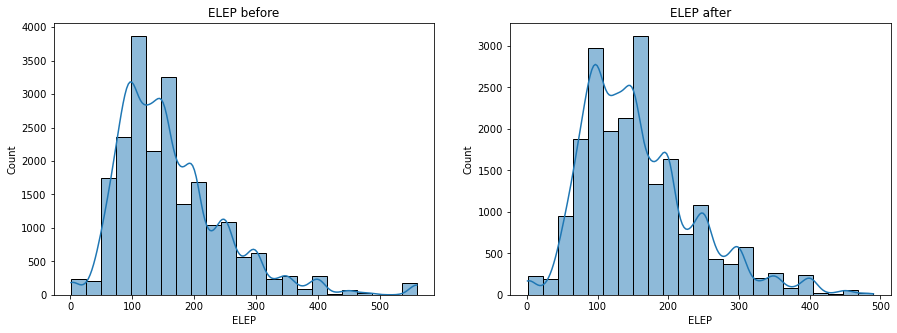

In [25]:
from matplotlib import pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(ax=axes[0], data=df, x="ELEP", kde=True, bins=23);
axes[0].set_title("ELEP before")

sns.histplot(ax=axes[1], data=df1, x="ELEP", kde=True, bins=23);
axes[1].set_title("ELEP after");

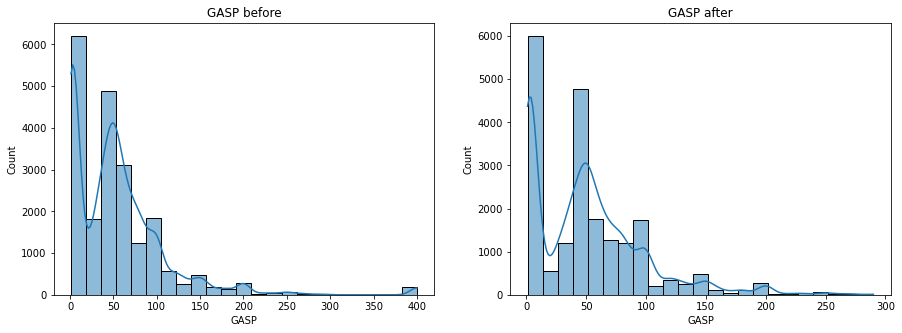

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(ax=axes[0], data=df, x="GASP", kde=True, bins=23);
axes[0].set_title("GASP before")

sns.histplot(ax=axes[1], data=df1, x="GASP", kde=True, bins=23);
axes[1].set_title("GASP after");

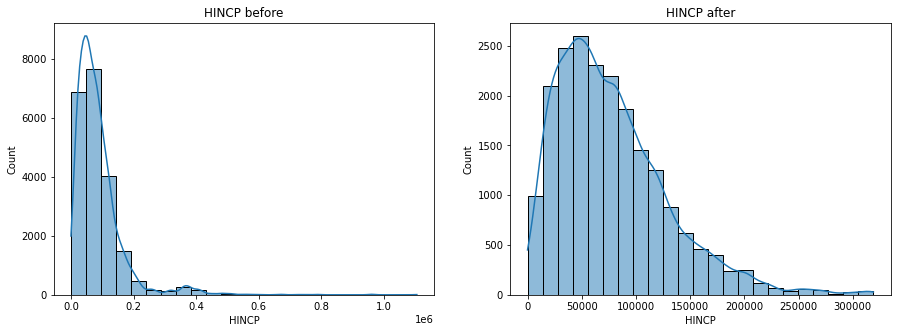

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(ax=axes[0], data=df, x="HINCP", kde=True, bins=23);
axes[0].set_title("HINCP before")

sns.histplot(ax=axes[1], data=df1, x="HINCP", kde=True, bins=23);
axes[1].set_title("HINCP after");

In [27]:
cols2 = ['AGEP','BDSP','ELEP','GASP','HINCP', 'NRC','RMSP', 'VALP'] # 구간 변수를 cols2에 저장 
df1[cols2].skew()                                                   # CONP가 제외됐음에 주의 

AGEP    -0.126
BDSP    -0.053
ELEP     0.994
GASP     1.355
HINCP    1.171
NRC      1.263
RMSP     1.280
VALP     1.848
dtype: float64

In [28]:
df1[cols2].kurtosis()

AGEP    -1.107
BDSP     1.250
ELEP     1.088
GASP     2.602
HINCP    1.855
NRC      1.125
RMSP     3.680
VALP     5.480
dtype: float64

In [29]:
df1[cols2].describe()

,AGEP,BDSP,ELEP,GASP,HINCP,NRC,RMSP,VALP
count,20495.000,20495.000,20495.000,20495.000,20495.000,20495.000,20495.000,20495.000
mean,43.215,3.141,157.293,51.449,77400.585,0.978,6.504,154910.925
std,24.098,0.759,79.225,47.074,51322.417,1.291,1.930,112248.559
min,0.000,0.000,1.000,1.000,0.000,0.000,1.000,1000.000
25%,21.000,3.000,100.000,3.000,39700.000,0.000,5.000,80000.000
50%,46.000,3.000,140.000,50.000,68000.000,0.000,6.000,130000.000
75%,63.000,4.000,200.000,70.000,104300.000,2.000,7.000,200000.000
max,93.000,5.000,490.000,290.000,319000.000,7.000,16.000,855000.000


In [30]:
# 참조 코딩
df1['VALP'].median()

130000.0

In [31]:
df1['VALP_B1'].value_counts(normalize=True)

0.000   0.510
1.000   0.490
Name: VALP_B1, dtype: float64

In [37]:
df1.to_csv('comb31-IQR30.csv', index=False)

# 4.5.4 상관계수 검토

In [32]:
import pandas as pd       # pandas library 불러내기.
import numpy as np        # numpy library 불러내기.
pd.set_option('display.max_columns', None)   # 결과물로 보여주는 열 갯수 최대화.
pd.set_option('display.max_rows', None)      # 결과물로 보여주는 행 갯수 최대화.
df1 = pd.read_csv('comb31-IQR30.csv') 
df1.shape

(20495, 31)

In [33]:
df1['VALP_B1'].value_counts(normalize=True)

0.000   0.510
1.000   0.490
Name: VALP_B1, dtype: float64

In [34]:
cols2 = ['AGEP','BDSP','ELEP','GASP','HINCP', 'NRC','RMSP', 'VALP'] # 구간 변수를 cols2에 저장 (타겟 변수 포함)
df1[cols2].corr()  # 구간 변수개끼리의 상관계수 구하기

,AGEP,BDSP,ELEP,GASP,HINCP,NRC,RMSP,VALP
AGEP,1.000,-0.179,-0.135,-0.039,-0.142,-0.622,-0.035,-0.016
BDSP,-0.179,1.000,0.203,0.066,0.273,0.244,0.582,0.313
ELEP,-0.135,0.203,1.000,-0.085,0.154,0.177,0.192,0.185
GASP,-0.039,0.066,-0.085,1.000,0.037,0.076,0.120,0.050
HINCP,-0.142,0.273,0.154,0.037,1.000,0.077,0.283,0.393
NRC,-0.622,0.244,0.177,0.076,0.077,1.000,0.084,0.026
RMSP,-0.035,0.582,0.192,0.120,0.283,0.084,1.000,0.384
VALP,-0.016,0.313,0.185,0.050,0.393,0.026,0.384,1.000


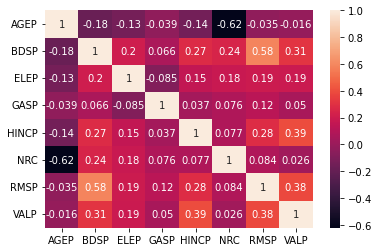

In [35]:
import seaborn as sns

corr = df1[cols2].corr()  
sns.heatmap(data=corr, annot=True);

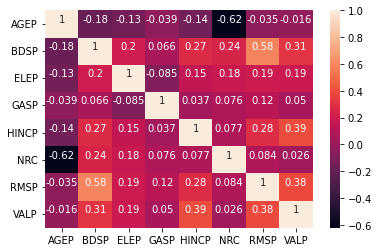

In [36]:
# 참조 코딩
import seaborn as sns

corr = df1[cols2].corr()  

annot_kws = {"ha": 'center',"va": 'bottom'}
sns.heatmap(data=corr, annot=True, annot_kws=annot_kws);